# Homework 2 Problem 1

In [24]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline

In [25]:
with open('raman.txt', 'r') as file:
    lines = file.readlines()
    
wavenumbers = []
intensities = []

for line in lines:
    values = line.split()
    if len(values) == 2:
        wavenumbers.append(float(values[0]))
        intensities.append(float(values[1]))

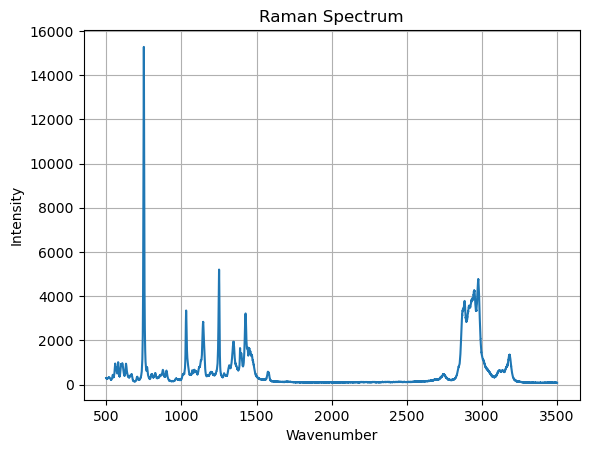

In [26]:
plt.figure()
plt.plot(wavenumbers, intensities)
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('Raman Spectrum')
plt.grid(True)
plt.show()

### 1a: Print the wavenumber estimates for the eight largest spectral peak to STDOUT sorted by magnitude (largest first).

In [27]:
peaks, _ = find_peaks(intensities)
print(peaks)

[   6    9   12 ... 7608 7612 7617]


In [28]:
# Define the width for regions of interest
n1 = 10  # Adjust as needed
n2 = 10  # Adjust as needed

# Initialize a dictionary to store peak wavenumbers and intensities
peak_data = {}

In [30]:
# Loop through detected peaks
for peak_index in peaks:
    peak_wavenumber = wavenumbers[peak_index]
    
    # Define the region of interest around the peak
    region_start = peak_wavenumber - n1
    region_end = peak_wavenumber + n1

    # Filter data within the region of interest
    region_wavenumbers = []
    region_intensities = []
    
    for i, wavenumber in enumerate(wavenumbers):
        if wavenumber >= region_start or wavenumber <= region_end:
            region_wavenumbers.append(wavenumber)
            region_intensities.append(intensities[i])
    
    # Make a spline for region of interest
    spline = UnivariateSpline(region_wavenumbers, region_intensities, s=0)
    
    # Calculate the derivative of the spline
    derivative = spline.derivative()
    
    # Find zero-crossings of the derivative to estimate wavenumbers with maximum intensity
    zero_crossings = []
    for i in range(1, len(region_wavenumbers) - 1):
        # Check if the derivative changes sign between adjacent points.
            if derivative(region_wavenumbers[i - 1]) * derivative(region_wavenumbers[i + 1]) < 0:
                zero_crossings.append(i)
    